### K-Nearest Neighbors (KNN) is a simple, easy-to-implement supervised machine learning algorithm which can be used for both classification and regression problems. One of the advantages of the KNN regression model is that it , usually, does not require too many parameters tuning to get good performance, and the speed of building the model is also fast. However, when using the KNN algorithm, it is very important to preprocess the data. For datasets with many features, and for datasets with most feature values of 0, the effect is often not very good.

### Sustainable Development Goals (SDGs) - An agreement by all United Nation members to improve quality of life worldwide by measurable metrics in 17 Goals. Each goal has several targets and indicators that are quantifiable metrics. The dataset used in this project gathered from government agencies in the various countries from 2000 to 2015 to support Goal 3: Good Health and Well-being.

In [98]:
#import data science libraries
import pandas as pd
import numpy as np
import seaborn as sns
from math import sqrt

from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# loading the data with new names
data = pd.read_csv("SDG_goal3_clean.csv", names=["con", "yr", "reg", "mat_mort", "bir_hlth", "inf_mortU", "inf_mortM", "inf_mortF", "u5_mortU", "u5_mortM", "u5_mortF", "neo_mort", "mort_disU", "mort_disM", "mort_disF", "diab_dth", "cancr_dth", "sui_mortU", "sui_mortM", "sui_mortF", "rd_dthU", "rd_dthM", "rd_dthF", "adol_bth", "uhc", "phy_wrk", "nurs_wrk", "pham_wrk"])
# previewing the dataset's first 2 rows
data.head(2)

,con,yr,reg,mat_mort,bir_hlth,inf_mortU,inf_mortM,inf_mortF,u5_mortU,u5_mortM,...,sui_mortM,sui_mortF,rd_dthU,rd_dthM,rd_dthF,adol_bth,uhc,phy_wrk,nurs_wrk,pham_wrk
0,Country,Year,Region,Maternal mortality ratio,Proportion of births attended by skilled healt...,"Infant mortality rate (deaths per 1,000 live b...","Infant mortality rate (deaths per 1,000 live b...","Infant mortality rate (deaths per 1,000 live b...","Under-five mortality rate, by sex (deaths per ...","Under-five mortality rate, by sex (deaths per ...",...,"Suicide mortality rate, by sex (deaths per 100...","Suicide mortality rate, by sex (deaths per 100...","Death rate due to road traffic injuries, by se...","Death rate due to road traffic injuries, by se...","Death rate due to road traffic injuries, by se...","Adolescent birth rate (per 1,000 women aged 15...",Universal health coverage (UHC) service covera...,"Health worker density, by type of occupation (...","Health worker density, by type of occupation (...","Health worker density, by type of occupation (..."
1,Albania,2000,Europe,23,99.1,24.1,27.4,20.6,27.2,30.1,...,7,2.8,14.3,22.4,6.1,17.2,44,13.821,40.17,3.432


In [99]:
#removing coloums and creating a new dataframe
df1=data.drop(0)
df = df1.drop(columns=df1.columns[0:12]).astype(float)
df.head()

,mort_disU,mort_disM,mort_disF,diab_dth,cancr_dth,sui_mortU,sui_mortM,sui_mortF,rd_dthU,rd_dthM,rd_dthF,adol_bth,uhc,phy_wrk,nurs_wrk,pham_wrk
1,18.7,23.5,12.9,0.014,0.275,4.9,7.0,2.8,14.3,22.4,6.1,17.2,44.0,13.821,40.170,3.432
2,26.7,34.1,20.2,0.063,0.199,3.4,5.1,1.9,19.6,32.2,8.6,31.6,44.0,27.007,59.089,0.345
3,25.7,33.9,18.5,0.065,0.226,4.2,6.6,2.1,18.3,28.6,9.2,25.9,45.0,25.643,49.884,0.319
4,25.0,33.9,17.4,0.064,0.253,6.7,10.5,3.5,18.0,27.7,9.5,27.1,57.0,28.419,52.396,0.427
5,12.9,16.0,9.8,0.031,0.374,12.7,19.9,5.6,9.9,14.0,5.7,17.8,79.0,24.944,100.871,8.056


(163, 16)

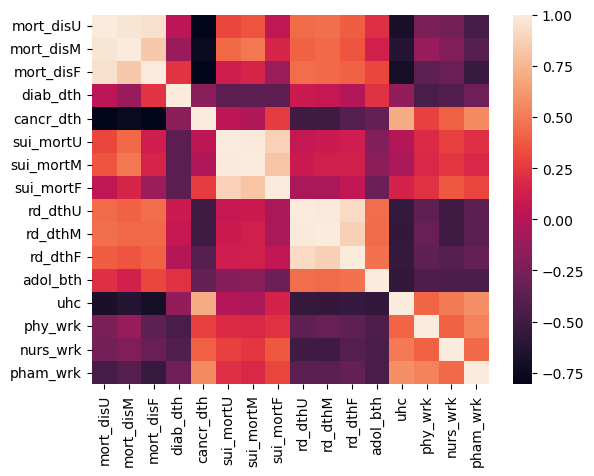

In [100]:
# Correlation between all the columns of DataFrame.
sns.heatmap(df.corr())
df.shape

### The dataset consists of 168 observations and 28 variables. Considering that the K nearest neighbors algorithm is successful in small data, we can ignore the small size of the data.Also, this dataset has been preprocessed, reshaped using Python and rows and columns with missing data are removed by Alan Fekete. 

### Our aim in the study is to predict the mortality rate with the KNN model. So "mort_disU (Mortality Rate Bothsex)" is our dependent variable. From the correlation heatmap, we are convinced that the mortality rate attributed to different diseases for both sex is highly corelated to Universal Health Coverage (UHC) and availability of health worker (Physician, Nurse, Pharmacists). Therefore, I used these as independent variables.

In [101]:
#Slice dataframe for predictive model
x = df[['uhc', 'phy_wrk', 'nurs_wrk','pham_wrk']].values
y = df['mort_disU'].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 30)

knn_model = KNeighborsRegressor(n_neighbors =30).fit(x_train, y_train)

In [102]:
#Create sample data for sample prediction
# random State 20
sample = [92, 34, 40, 48]
sample_prediction = knn_model.predict([sample])
print('-----Sample test case-----')
print('Universal health coverage: ', sample[0])
print('Density of Physician: ', sample[1])
print('Density of Nurse: ', sample[2])
print('Density of Pharmacist: ', sample[3])
print('Predicted mortality rate: ', int(sample_prediction))
print('--------------------------')

-----Sample test case-----
Universal health coverage:  92
Density of Physician:  34
Density of Nurse:  40
Density of Pharmacist:  48
Predicted mortality rate:  16
--------------------------


In [111]:
# knn_model = KNeighborsRegressor().fit(x_train, y_train)
predicted_values = knn_model.predict(x_test)

In [112]:
predict_df = pd.DataFrame({"Mortality Rate_Actual" : y_test, "Mortality Rate_Predicted" : predicted_values})
predict_df.head()

,Mortality Rate_Actual,Mortality Rate_Predicted
0,16.1,15.296667
1,28.9,15.896667
2,27.1,22.420000
3,22.5,21.370000
4,12.7,20.120000


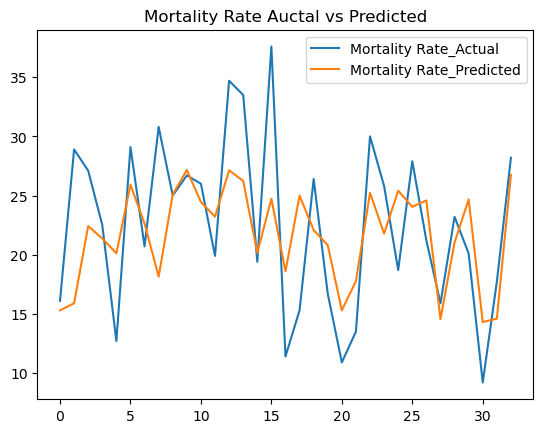

In [119]:
#create the graph
plt.title("Mortality Rate Auctal vs Predicted")
plt.plot(y_test, label = "Mortality Rate_Actual")
plt.plot(predicted_values, label = "Mortality Rate_Predicted")
# plt.xlabel("Value of K for KNN")
# plt.xticks(neighbour_count)
# plt.ylabel("Testing Accurracy MSE Value")
plt.legend()
plt.show()

In [105]:
#Actual predictions

mean_square_error = metrics.mean_squared_error(y_test, predicted_values)
print("Mean Squared Error (MSE) = ", mean_square_error)
print("Root Mean Squared Error (RMSE): ", sqrt(mean_square_error))
#An r-squared score of 1/near one means that the variables are closely correlated
print("R-squared score: ", metrics.r2_score(y_test, predicted_values))

Mean Squared Error (MSE) =  33.511872053872054
Root Mean Squared Error (RMSE):  5.788943949795338
R-squared score:  0.3492025771470202


### To examine the success of the model with statistical methods, we looked at the MSE value. The RMSE value being 5.78 indicates that a lot of the data is relatively spreadout, confirms that a kNN regression model is not the optimum model to be used in this study. 

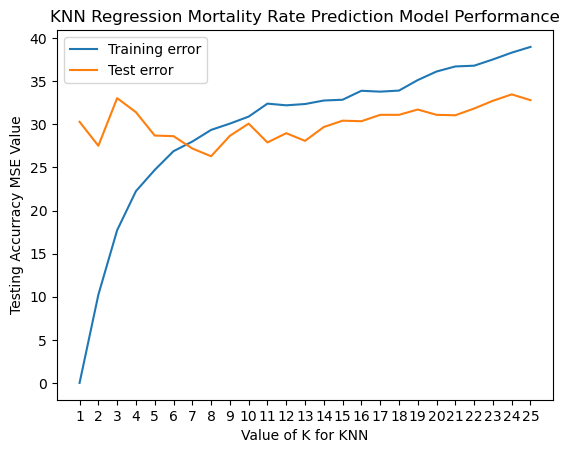

In [120]:
#Learning curve
mse_training_values = []
mse_test_values = []
neighbour_count = [1, 2, 3, 4, 5, 6, 7, 8, 9 ,10, 11, 12, 13, 14, 15, 16 ,17, 18, 19, 20, 21, 22, 23, 24, 25]

#find error rates in a range of 20 neighbours 
for k in range(25):
    k += 1
    #run the kNN regression model
    model_evaluator = KNeighborsRegressor(n_neighbors = k)
    #fit in training data
    model_evaluator.fit(x_train, y_train)
    
    #make the predictions
    training_prediction = model_evaluator.predict(x_train)
    test_prediction = model_evaluator.predict(x_test)
    
    #check MSE values for both test and training values
    training_error_values = metrics.mean_squared_error(y_train, training_prediction)
    test_error_values = metrics.mean_squared_error(y_test, test_prediction)
    
    #append everything to the appropriate lists
    mse_training_values.append(training_error_values)
    mse_test_values.append(test_error_values)

#create the graph
plt.title("KNN Regression Mortality Rate Prediction Model Performance")
plt.plot(neighbour_count, mse_training_values, label = "Training error")
plt.plot(neighbour_count, mse_test_values, label = "Test error")
plt.xlabel("Value of K for KNN")
plt.xticks(neighbour_count)
plt.ylabel("Testing Accurracy MSE Value")
plt.legend()
plt.show()

### The scatterplot above shows us a graphical interpretation and helps provide context of the results of our predictive model.

### Looking at the learning curve and the comparisons between the MSE scores of the training and test data, we can see that the model is overfitting for low neighbour counts. However, when k = 6, both the training and test error converge when y is between 25 and 30, which confirms that beyond this point, there is no benefit increasing the training size of the dataset.